# Data Exploration and Clustering

## This is to explore data specifically to find evident patterns

I will visualize all the numerical and categorical features to find sharp patterns, to try to find out clusters

In [56]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

%matplotlib inline
pd.set_option('display.max_columns', None)

In [57]:
df = pd.read_csv('clean_data_22_features_2.csv')

y = df.y
df = df.drop('y',axis=1)

In [58]:
def normalizer(data):
    
    normalized = (data-min(data))/(max(data)-min(data))
    return normalized

normdf = pd.DataFrame()

for column in df:
    normdf[column] = normalizer(df[column])

normdf.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pdayscat,agecat,campcat
0,0.481481,0.3,0.5,0.166667,0.0,0.0,0.0,1.0,0.666667,0.25,0.0,1.0,0.0,0.5,0.9375,0.698753,0.60251,0.957379,0.859735,0.0,0.0,1.0
1,0.246914,0.7,0.5,0.666667,0.0,1.0,0.0,1.0,0.666667,0.25,0.0,1.0,0.0,0.5,0.9375,0.698753,0.60251,0.957379,0.859735,0.0,0.0,1.0
2,0.283951,0.0,0.5,0.333333,0.0,0.0,0.0,1.0,0.666667,0.25,0.0,1.0,0.0,0.5,0.9375,0.698753,0.60251,0.957379,0.859735,0.0,0.0,1.0
3,0.481481,0.7,0.5,0.666667,0.0,0.0,1.0,1.0,0.666667,0.25,0.0,1.0,0.0,0.5,0.9375,0.698753,0.60251,0.957379,0.859735,0.0,0.0,1.0
4,0.518519,0.0,0.5,0.833333,0.0,0.0,0.0,1.0,0.666667,0.25,0.0,1.0,0.0,0.5,0.9375,0.698753,0.60251,0.957379,0.859735,0.0,0.0,1.0


In [4]:
def histogram_function(column):
    """ Plots a histogram """
    
    fig = sns.FacetGrid(df,hue='y',aspect=4)
    fig.map(sns.distplot,column,bins = np.arange(df[column].min(),df[column].max(),1),kde=False)

    high = df[column].max()
    low = df[column].min()

    fig.set(xlim=(low,high))

    fig.add_legend()

In [5]:
def barplot_function(column):
    """ Plots a barplot """
    
    fig = sns.FacetGrid(df,aspect=4)
    fig.map(sns.barplot,column,'y')

In [6]:
numeric1 = ['age', 'campaign', 'pdays', 'previous', 'emp.var.rate']
numeric2 = ['cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
binary = ['default', 'housing', 'loan','contact','pdayscat']
categorical = ['poutcome', 'job', 'marital', 'month','day_of_week','agecat']
hierarchy = ['education']

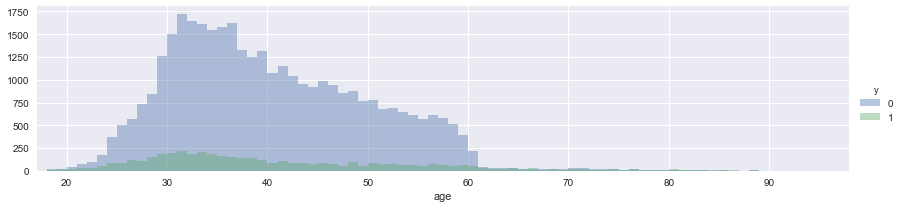

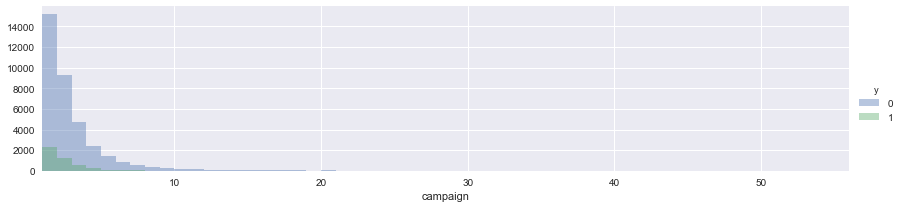

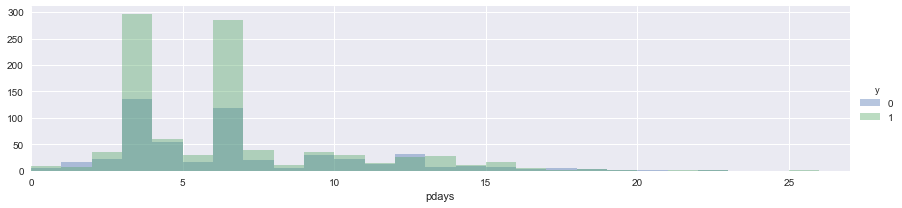

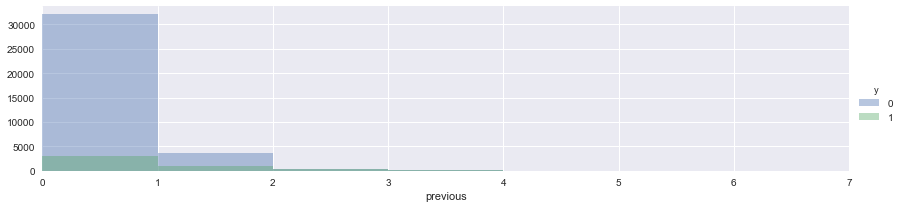

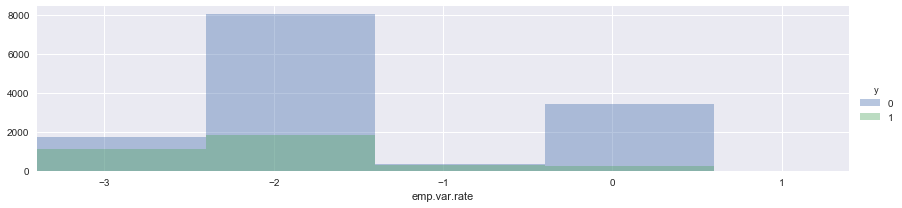

In [11]:
df.loc[df.pdays == 999, 'pdays'] = np.nan
for column in numeric1:
    histogram_function(column)

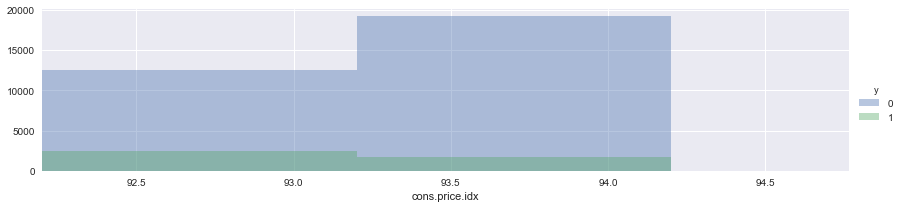

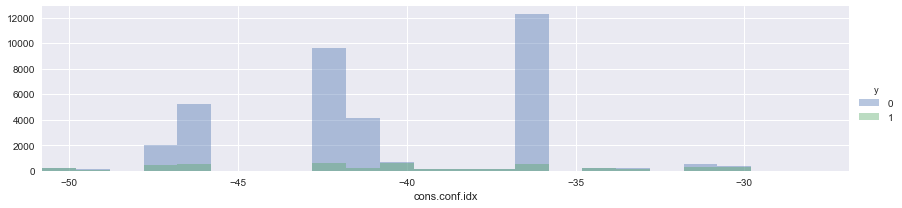

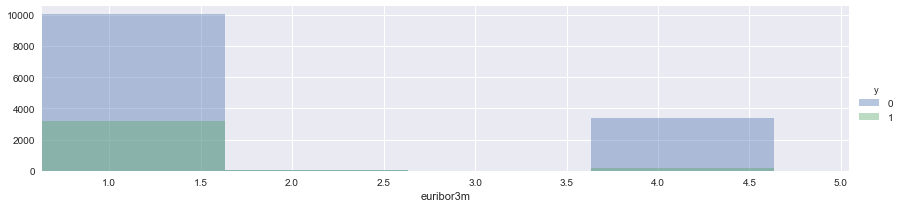

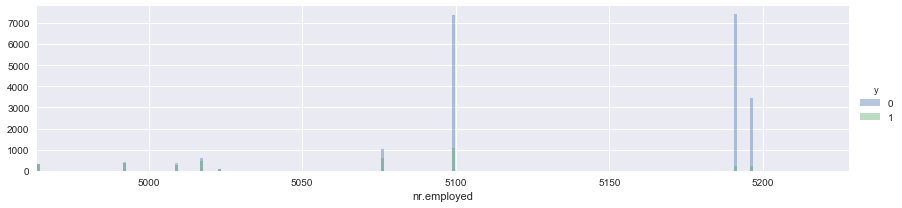

In [68]:
for column in numeric2:
    histogram_function(column)

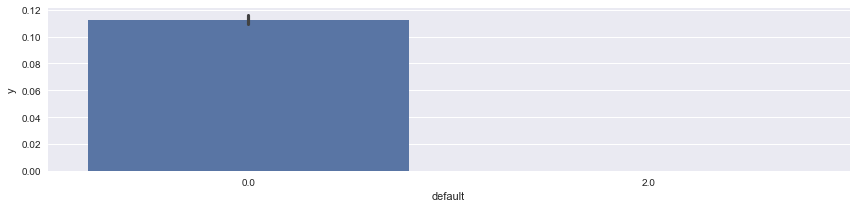

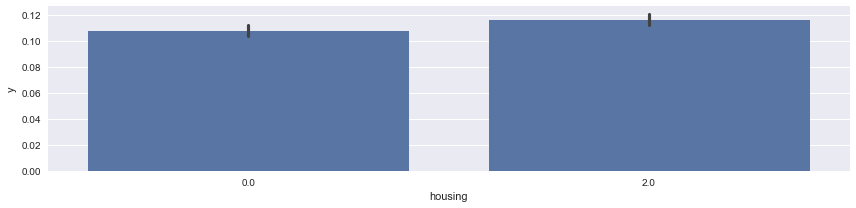

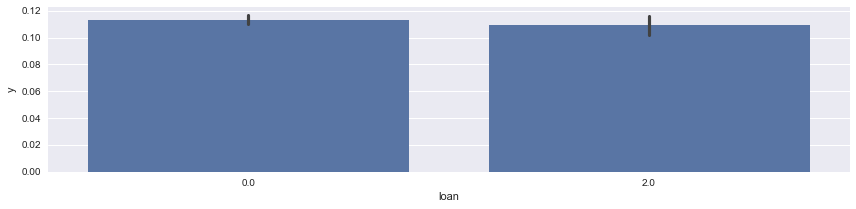

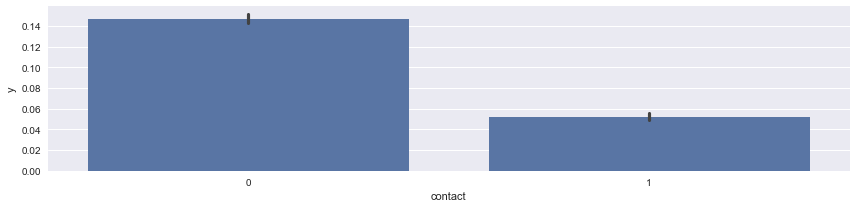

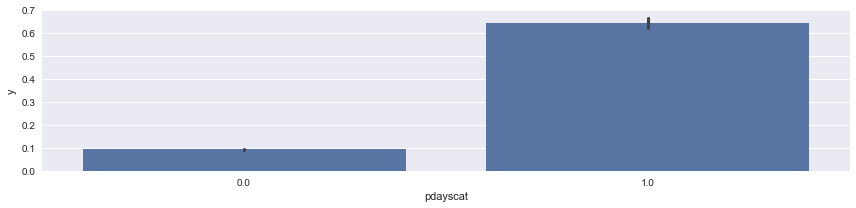

In [69]:
for column in binary:
    barplot_function(column)

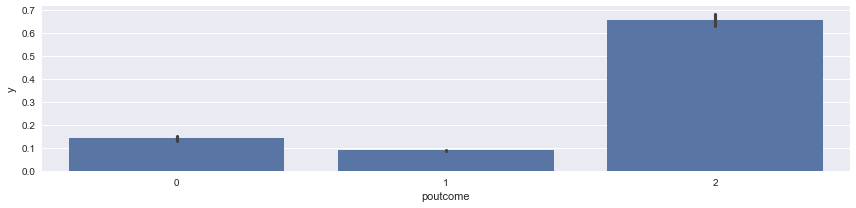

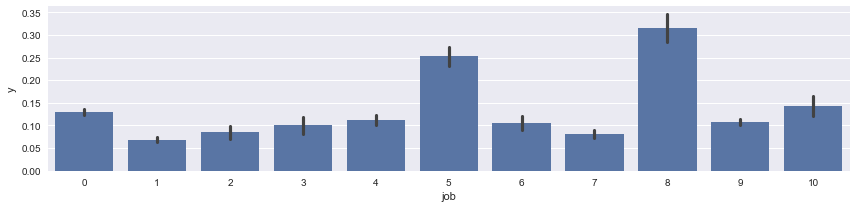

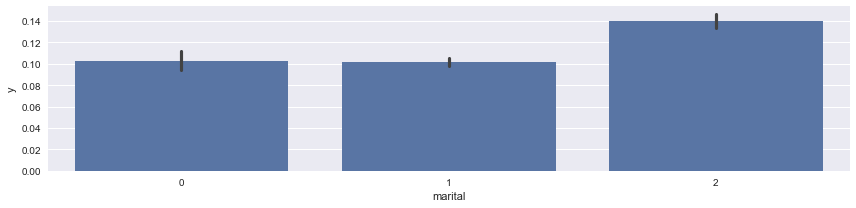

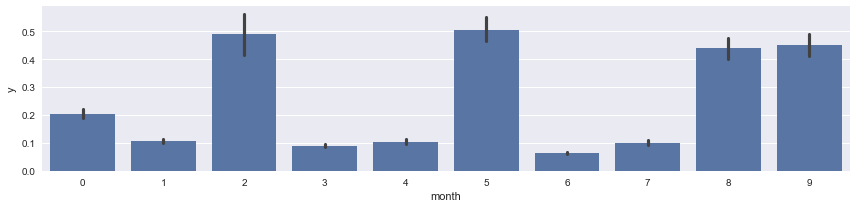

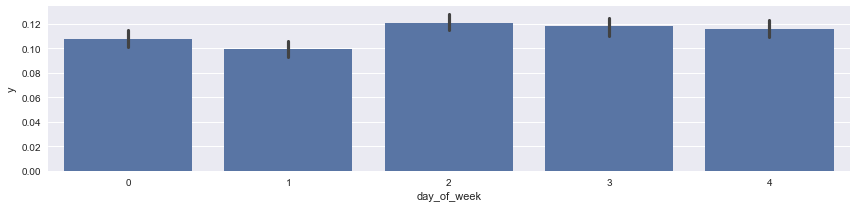

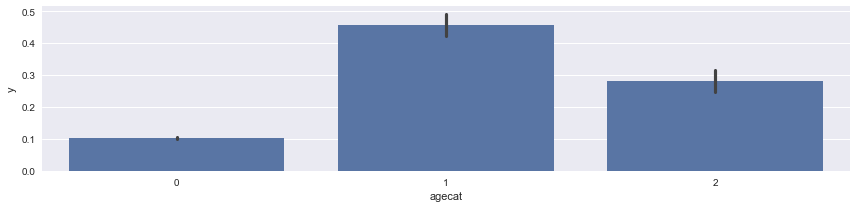

In [70]:
for column in categorical:
    barplot_function(column)

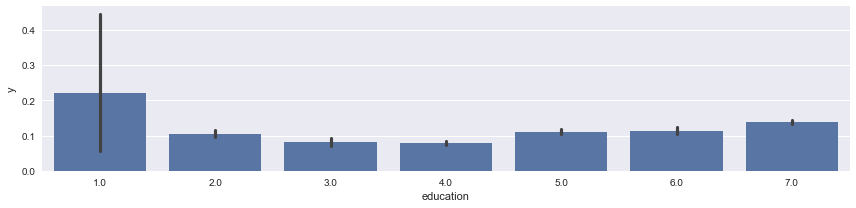

In [71]:
for column in hierarchy:
    barplot_function(column)

In [7]:
numeric = numeric1 + numeric2
for i in range(len(numeric)):
    for j in range(i,len(numeric)):
        fig = sns.FacetGrid(df,hue='y')
        fig.map(sns.lmplot,x = numeric[i],y= numeric[j],fit_reg=False)

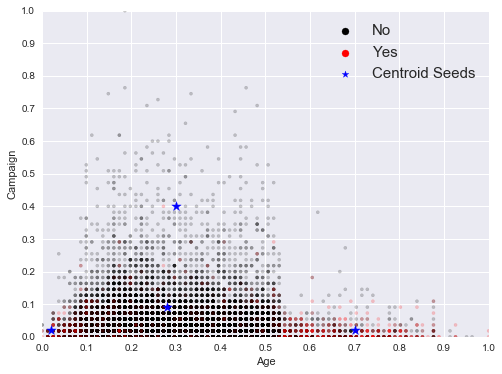

In [61]:
#Centroids for clustering
centroids = np.array([[0.02,0.02],
                     [0.28,0.09],
                     [0.7,0.02],
                     [0.3,0.4]],
                    np.float64)

colormap = np.array(['k','r'])
fig = plt.figure(figsize=(8,6))
plt.xlim((0,1))
plt.ylim((0,1))
plt.xticks(np.arange(0,1.1,0.1))
plt.yticks(np.arange(0,1.1,0.1))

plt.xlabel("Age")
plt.ylabel("Campaign")

plt.scatter(x=normdf.age,y=normdf.campaign, s=10, c=colormap[y], alpha = 0.2)
plt.scatter(x=centroids[:,0],y=centroids[:,1], s=100, c='blue', marker='*')
p1 = plt.scatter([50,100], [50,100], marker='o', color=colormap[0])
p2 = plt.scatter([50,100], [50,100], marker='o',color=colormap[1])
p3 = plt.scatter([50,100], [50,100], marker='*',color='blue')
plt.legend((p1,p2,p3),('No','Yes','Centroid Seeds'),numpoints=1, loc=1, fontsize=15)

In [29]:
centroids[:,0]

array([ 0.002,  0.28 ,  0.7  ,  0.4  ])

## K-means Clustering

In [62]:
# Import necessary modules from `sklearn` 
from sklearn.cluster import KMeans
from sklearn import metrics

data = normdf[['age','campaign']].values

# Create silhouette score dictionary
s_score_dict = {}
# for i in range(2,5):
km = KMeans(n_clusters=4, init = centroids, algorithm='full')
l = km.fit_predict(data)
#     s_score_dict[i] = [s_s]
# print (s_s)

# Print out `s_score_dict`
# print(s_score_dict)

C:\Users\Nachiket\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:889: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return_n_iter=True)


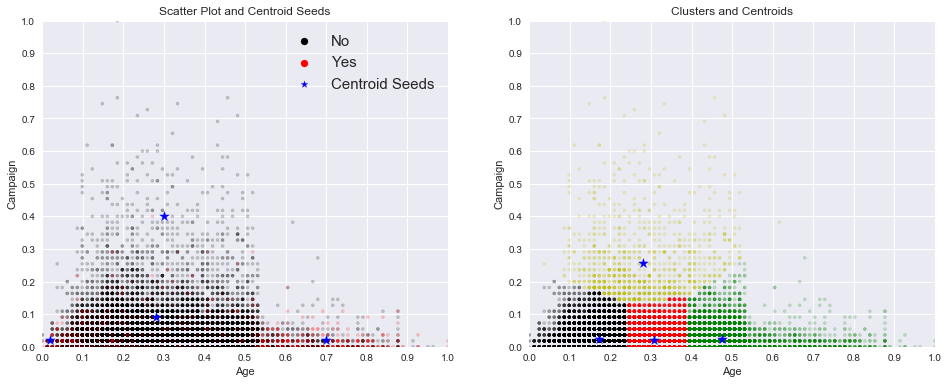

In [66]:
preds = km.labels_
centroids2 = km.cluster_centers_

#Centroids for clustering
centroids = np.array([[0.02,0.02],
                     [0.28,0.09],
                     [0.7,0.02],
                     [0.3,0.4]],
                    np.float64)


colormap = np.array(['k','r','g','y'])

# Plot Orginal
fig = plt.figure(figsize=(16,6))


plt.subplot(1, 2, 1)

plt.xlim((0,1))
plt.ylim((0,1))
plt.xticks(np.arange(0,1.1,0.1))
plt.yticks(np.arange(0,1.1,0.1))
plt.xlabel("Age")
plt.ylabel("Campaign")

plt.scatter(x=normdf.age,y=normdf.campaign, s=10, c=colormap[y], alpha = 0.2)
plt.scatter(x=centroids[:,0],y=centroids[:,1], s=100, c='blue', marker='*')
p1 = plt.scatter([50,100], [50,100], marker='o', color=colormap[0])
p2 = plt.scatter([50,100], [50,100], marker='o',color=colormap[1])
p3 = plt.scatter([50,100], [50,100], marker='*',color='blue')
plt.legend((p1,p2,p3),('No','Yes','Centroid Seeds'),numpoints=1, loc=1, fontsize=15)
plt.title('Scatter Plot and Centroid Seeds')
 
# Plot Predicted with corrected values
plt.subplot(1, 2, 2)

plt.xlim((0,1))
plt.ylim((0,1))
plt.xticks(np.arange(0,1.1,0.1))
plt.yticks(np.arange(0,1.1,0.1))
plt.xlabel("Age")
plt.ylabel("Campaign")

plt.scatter(x=normdf.age, y=normdf.campaign, c=colormap[preds], s=10, alpha=0.2)
plt.scatter(x=centroids2[:,0],y=centroids2[:,1], s=100, c='blue', marker='*')
plt.title('Clusters and Centroids')

In [54]:
centroids = pd.DataFrame(preds, columns=['centroid1'])
centroids.head()

,centroid1
0,1
1,2
2,2
3,1
4,1


In [55]:
centroids2

array([[ 70.89627959,   1.96505073],
       [ 49.63328092,   2.34627743],
       [ 32.99181116,   2.1683309 ],
       [ 38.92825112,  12.48355755]])

In [60]:
centroids.to_csv("centroids.csv",index=False)